In [2]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

import pandas as pd
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 14

from matplotlib.ticker import ScalarFormatter, LogLocator


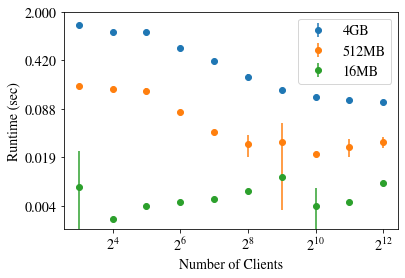

In [3]:
# GENERATING NAIVE DATA PLOT WITH 16 NODES, 32 TPN
output1 = "basic-chare-benchmarks/frontier/results/odfr16nodes512tasks4096MB.out"
output2 = "basic-chare-benchmarks/frontier/results/odfr16nodes512tasks512MB.out"
output3 = "basic-chare-benchmarks/frontier/results/odfr16nodes512tasks16MB.out"

fig, ax = plt.subplots()

for file in [output1, output2, output3]:
    dataframe = pd.read_csv(file, sep=' ', header=None)
    dataframe.columns = ['#PEs', 'Clients', 'Time']
    
    grouped = dataframe.groupby('Clients').agg(['mean', 'std'])
    ax.errorbar(grouped.index, grouped['Time']['mean'], yerr=grouped['Time']['std'], fmt='o')

# plot setup
ax.set_xscale('log', base=2)
ax.set_yscale('log')

ax.set_yticks(np.logspace(-8, 1, num = 5, base=2))
ax.get_yaxis().set_tick_params(which='minor', size=0)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

plt.xlabel('Number of Clients')
plt.ylabel('Runtime (sec)')
plt.legend(['4GB', '512MB', '16MB'])

/jet/home/mtaylor5/ckio-testsuite/.venv/lib64/python3.6/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


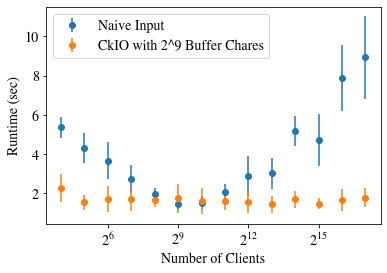

In [7]:
# PLOT 2 for the paper: FOR NAIVE VS CKIO

### plot basic summary data as BC vs average time (with error bars) ###
summary_file = 'basic-chare-benchmarks/bridges/results/16nodes_32tasks_4GB/summary.out'
ckio_file = 'ckio-benchmarks/bridges/results/16nodes-32tasks-4GB-2^9BC.out'


# read data in format (chares, 10 runs)
summary_data = pd.read_csv(summary_file, sep=' ', header=None)
summary_data.columns = ['#BC', 'run1', 'run2', 'run3', 'run4', 'run5', 'run6', 'run7', 'run8', 'run9', 'run10']
plt.errorbar(summary_data['#BC'], summary_data.iloc[:, 1:].mean(axis=1), yerr=summary_data.iloc[:, 1:].std(axis=1), fmt='o')

# read data in format (chares, 10 runs)
ckio_summary = pd.read_csv(ckio_file, sep=' ', header=None)
ckio_summary.columns = ['#PEs', '#BC', 'run1', 'run2', 'run3', 'run4', 'run5', 'run6', 'run7', 'run8', 'run9', 'run10']
plt.errorbar(ckio_summary['#PEs'], ckio_summary.iloc[:, 2:].mean(axis=1), yerr=ckio_summary.iloc[:, 2:].std(axis=1), fmt='o')

# plot setup
plt.xscale('log', basex=2)
plt.xlabel('Number of Clients')
plt.ylabel('Runtime (sec)')
#plt.title('4GB File Read, 16 Nodes (2^9 PEs) on Bridges2')
plt.legend(['Naive Input', 'CkIO with 2^9 Buffer Chares'])

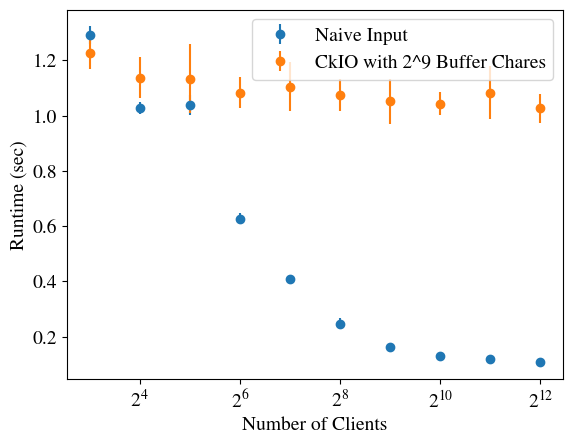

In [3]:
# PLOT 2 for the paper: FOR NAIVE VS CKIO on FRONTIER

### plot basic summary data as BC vs average time (with error bars) ###
summary_file = 'basic-chare-benchmarks/frontier/results/odfr16nodes512tasks4096MB.out'
ckio_file = 'ckio-benchmarks/frontier/results/vary-clients-16nodes512tasks2^6bc.out'

# read data in format (chares, 10 runs)
summary_data = pd.read_csv(summary_file, sep=' ', header=None)
summary_data.columns = ['PEs', 'clients', 'time']
grouped = summary_data.groupby('clients').agg(['mean', 'std'])
plt.errorbar(grouped.index, grouped['time']['mean'], yerr=grouped['time']['std'], fmt='o')

# read data in format (chares, 10 runs)
ckio_summary = pd.read_csv(ckio_file, sep=' ', header=None)
ckio_summary.columns = ['clients', 'bc', 'pes', 'size', 'bg', 'time']
grouped = ckio_summary.groupby('clients').agg(['mean', 'std'])
plt.errorbar(grouped.index, grouped['time']['mean'], yerr=grouped['time']['std'], fmt='o')

# plot setup
plt.xscale('log', base=2)
plt.xlabel('Number of Clients')
plt.ylabel('Runtime (sec)')
#plt.title('4GB File Read, 16 Nodes (2^9 PEs) on Bridges2')
plt.legend(['Naive Input', 'CkIO with 2^9 Buffer Chares'])

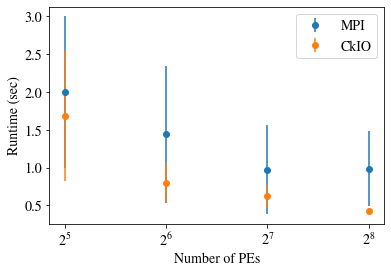

In [15]:
# MPI COMPARISON

# GENERATING NAIVE DATA PLOT WITH 16 NODES, 32 TPN
output1 = "mpi-benchmarks/1GBnooutliers.out"
output2 = "basic-chare-benchmarks/bridges/results/1GB_32tpn.out"


fig, ax = plt.subplots()

for file in [output1, output2]:
    dataframe = pd.read_csv(file, sep=' ', header=None)
    dataframe.columns = ['#PEs', 'Misc', 'Time']
    
    grouped = dataframe.groupby('#PEs').agg(['mean', 'std'])
    ax.errorbar(grouped.index, grouped['Time']['mean'], yerr=grouped['Time']['std'], fmt='o')


# plot setup
ax.set_xscale('log', base=2)



plt.xlabel('Number of PEs')
plt.ylabel('Runtime (sec)')
plt.legend(['MPI', "Naive Charm"])

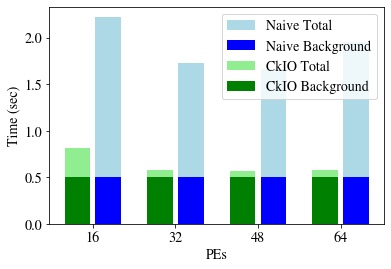

In [6]:
# FIXED BG WORK: NAIVE VS CKIO

naive_file = 'basic-chare-benchmarks/bridges/results/bg1GB-lessbg.out'
ckio_file = 'ckio-benchmarks/bridges/bg-results/bg1GB-lessbg.out'

naive = pd.read_csv(naive_file, sep=' ', header=None)
naive.columns = ['PEs', 'Chares', 'BG', 'Total']
naive = naive.groupby('PEs').agg(['min', 'std'])



ckio = pd.read_csv(ckio_file, sep=' ', header=None)
ckio.columns = ['Clients', 'BCs', 'PEs', 'size', 'BG', 'Total']
ckio = ckio.groupby('PEs').agg(['min', 'std'])


import matplotlib.pyplot as plt

# Plotting the grouped bars
plt.bar(naive.index + 3, naive['Total']['min'], label='Naive Total', width=5, color='lightblue')
plt.bar(naive.index + 3, naive['BG']['min'], label='Naive Background', width=5, color='blue')

plt.bar(ckio.index - 3, ckio['Total']['min'], label='CkIO Total', width=5, color='lightgreen')
plt.bar(ckio.index - 3, ckio['BG']['min'], label='CkIO Background', width=5, color='green')

# Set the x-axis ticks to show only the desired values
plt.xticks([16, 32, 48, 64])

# Plot setup
plt.xlabel('PEs')
plt.ylabel('Time (sec)')
plt.legend()



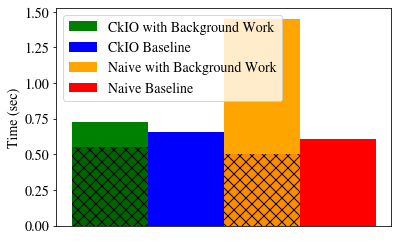

In [86]:
# FIXED BACKGROUND WORK

ckio_file = 'ckio-benchmarks/bridges/ucx-results/4nodes.out'
naive_file = 'basic-chare-benchmarks/bridges/results/ucx-bgtest-1GB.out'


naive = pd.read_csv(naive_file, sep=' ', header=None)
naive.columns = ['PEs', 'Chares', 'BG', 'Total']

nobg = naive[naive['BG'] == 0]
naive = naive[naive['BG'] != 0]

naive = naive.groupby('PEs').agg(['mean', 'std'])
naivenobg = nobg.groupby('PEs').agg(['mean', 'std'])


nobg = pd.read_csv(ckio_file, sep=' ', header=None)
nobg.columns = ['Clients', 'BCs', 'PEs', 'size', 'BG', 'Total', 't1', 't2', 't3', 't4', 't5']
nobg = nobg[nobg['BG'] == 0 ]

nobg = nobg.groupby('PEs').agg(['mean', 'std'])

ckio = pd.read_csv(ckio_file, sep=' ', header=None)
ckio.columns =  ['Clients', 'BCs', 'PEs', 'size', 'BG', 'Total', 't1', 't2', 't3', 't4', 't5']
ckio = ckio[ckio['BG'] != 0 ]

ckio = ckio.groupby('PEs').agg(['mean', 'std'])


ckio = ckio[ckio.index == 8]
nobg = nobg[nobg.index == 8]
naive = naive[naive.index == 8]
naivenobg = naivenobg[naivenobg.index == 8]

N = np.arange(1)
# Plotting the grouped bars
ckio_index_list = list(map(str, ckio.index))
plt.bar(N-.3, ckio['Total']['mean'], label='CkIO with Background Work', width=.2, color='green',)
plt.bar(N-.3, ckio['BG']['mean'], width=.2, color='darkgreen', hatch='xx')

plt.bar(N-.1, nobg['Total']['mean'], label='CkIO Baseline', width=.2, color='blue', )

plt.bar(N+.1, naive['Total']['mean'], label='Naive with Background Work', width=.2, color='orange')
plt.bar(N+.1, naive['BG']['mean'], width=.2, color='darkorange', hatch='xx')

plt.bar(N+.3, naivenobg['Total']['mean'],  label='Naive Baseline', width=.2, color='red')


# Remove x-axis tick marks
plt.xticks([])

# Plot setup
plt.ylabel('Time (sec)')
plt.legend(loc='upper left')


([<matplotlib.axis.XTick at 0x7f638b5d9ef0>,
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '4'),
  Text(3, 0, '8'),
  Text(4, 0, '16'),
  Text(5, 0, '32'),
  Text(6, 0, '64'),
  Text(7, 0, '128'),
  Text(8, 0, '256'),
  Text(9, 0, '512')])

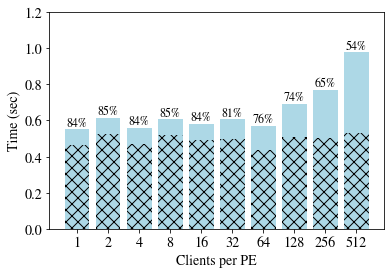

In [35]:
# VARIABLE BACKGROUND WORK

nobg_file = 'ckio-benchmarks/bridges/results/vary-clients-16nodes512tasks2^9bc4GB.out'
bg_file = 'ckio-benchmarks/bridges/ucx-results/4nodes-varyreaders-variable.out'

bg = pd.read_csv(bg_file, sep=' ', header=None)
bg.columns = ['Clients', 'PEs', 'BC', 'Size', 'BG', 'Total', 't1', 't2', 't3', 't4', 't5']

bg['Clients'] = bg['Clients'] / 8
min_columns = bg.groupby('Clients')['Total'].idxmin()
bg = bg.loc[min_columns]

N = np.arange(10)
bars = plt.bar(N, bg['Total'], width=.8, color='lightblue')
plt.bar(N, bg['BG'], width=.8, color='lightblue', hatch='xx') 

percentages = list(bg['BG'] / bg['Total'] * 100)

# Print percentage of BG/Total over each bar
for idx, bar in enumerate(bars):
    height = bar.get_height()
    percentage = percentages[idx]
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.0f}%', ha='center', va='bottom', fontsize=12)

bgindexstr = list(map(str, map(int,bg['Clients'])))
plt.xticks(N, bgindexstr)
plt.ylim(0, 1.2)
plt.ylabel('Time (sec)')
plt.xlabel('Clients per PE')

plt.xticks(N, bgindexstr)